# This notebook plots the BPZ statistics of a deepfield spectroscopic selected mock KV450 sample. This notebook serves as a benchmark test with a comparison with MICE2 mock results.

In [27]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../plotting/')
import plots_zy as plot

In [28]:
from importlib import reload  # Python 3.4+
reload(plot)

<module 'plots_zy' from '../plotting/plots_zy.py'>

## Load spec-selected DC2 mock, MICE2 mock and the real KV450 data

In [23]:
outroot = os.path.expanduser('~')+'/DATA/mocks/MICE2_KV450_cut/REALISATIONS_magnification_on'

surveys = ['DEEP2','VVDSf02','zCOSMOS']
zspec_mock = np.array([])
zb_mock = np.array([])
mag_mock = np.array([])
zspec = np.array([])
zb = np.array([])
mag = np.array([])
for survey in surveys:
    KV450_path = os.path.expanduser('~')+'/DATA/mocks/KV450/SPECZ/DIR_'+survey+'.fits'
    KV450_file = fits.open(KV450_path, mode="update")
    zspec = np.hstack([zspec, (KV450_file[1].data['z_spec_A'] + KV450_file[1].data['z_spec_B'] + KV450_file[1].data['z_spec_C'])/3])
    zb = np.hstack([zb, KV450_file[1].data['Z_B']])
    mag = np.hstack([mag, KV450_file[1].data['MAG_GAAP_r']])
    

zspec_mice2mock = np.array([])
zb_mice2mock = np.array([])
mag_mice2mock = np.array([])
for survey in surveys:
    KV450_path = outroot+'/'+survey+'_phot_samples/'+survey+'_phot_samples_1.fits'
    KV450_file = fits.open(KV450_path, mode="update")
    zspec_mice2mock = np.hstack([zspec_mice2mock, KV450_file[1].data['z_cgal_v']])
    zb_mice2mock = np.hstack([zb_mice2mock, KV450_file[1].data['Z_B']])
    mag_mice2mock= np.hstack([mag_mice2mock, KV450_file[1].data['sdss_r_obs_mag']])


outroot = os.path.expanduser('~')+'/DATA/mocks/cosmoDC2/KV450_mock/REALISATION/'

zspec_dc2mock = np.array([])
zb_dc2mock = np.array([])
mag_dc2mock = np.array([])
for survey in surveys:
    KV450_path = outroot+'/'+survey+'_phot_samples/'+survey+'_phot_samples.fits'
    KV450_file = fits.open(KV450_path, mode="update")
    zspec_dc2mock = np.hstack([zspec_dc2mock, KV450_file[1].data['redshift']])
    zb_dc2mock = np.hstack([zb_dc2mock, KV450_file[1].data['Z_B']])
    mag_dc2mock= np.hstack([mag_dc2mock, KV450_file[1].data['mag_r_lsst_obs']])
    
    


## Plot BPZ statistics

../plotting/plots_zy.py:57: RuntimeWarning: invalid value encountered in true_divide
  np.abs(stat[bin_mask] - (dzs/znorms)[i]))
/net/home/fohlen13/yanza21/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/net/home/fohlen13/yanza21/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
../plotting/plots_zy.py:57: RuntimeWarning: invalid value encountered in true_divide
  np.abs(stat[bin_mask] - (dzs/znorms)[i]))
/net/home/fohlen13/yanza21/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/net/home/fohlen13/yanza21/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcou

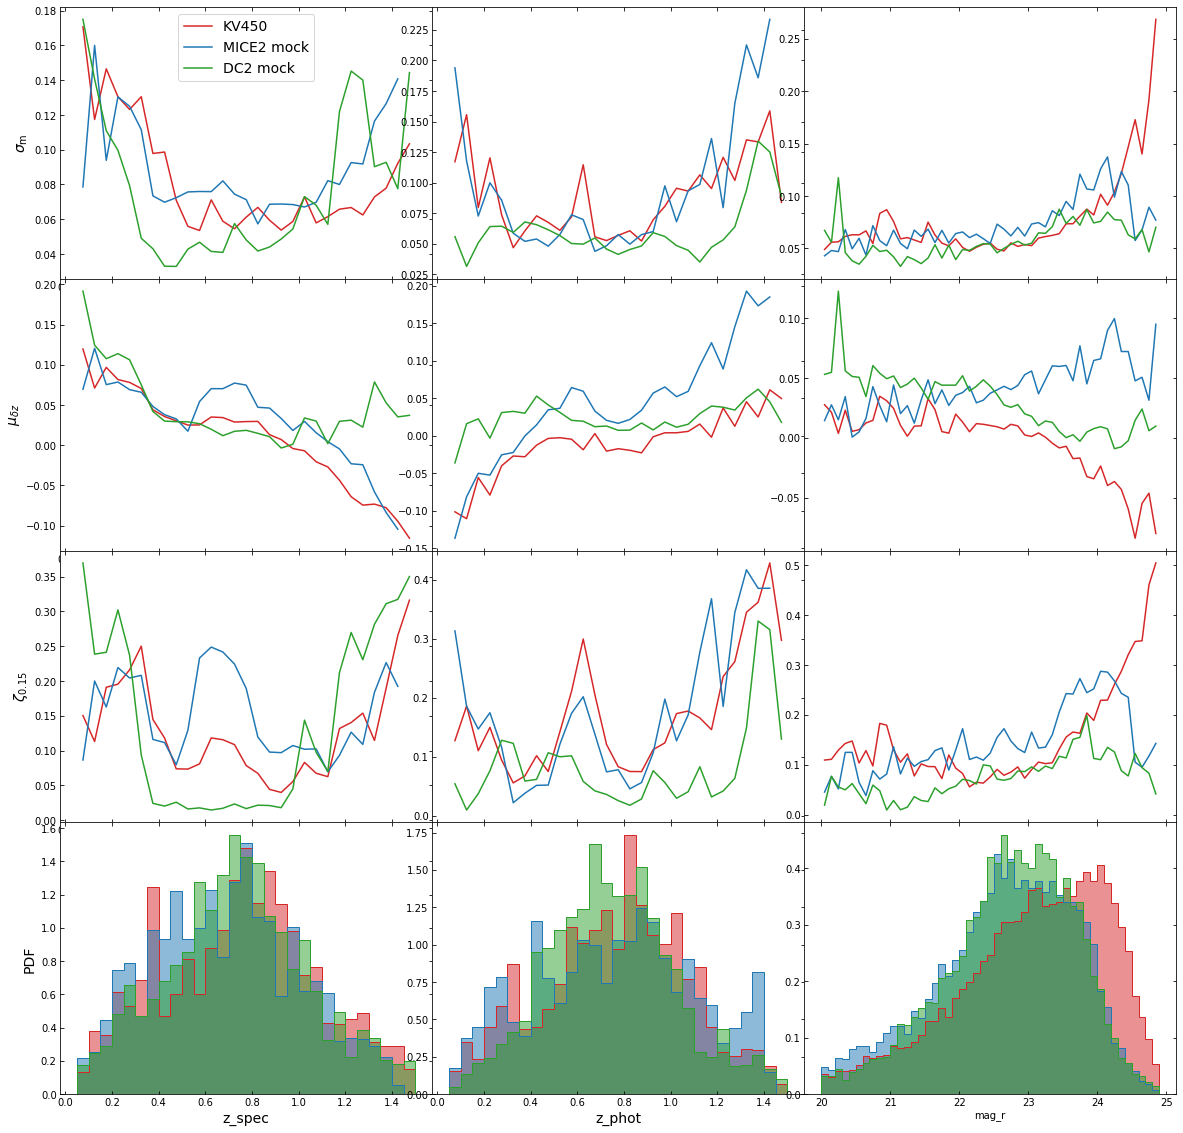

In [26]:
fig, axes = plt.subplots(4,3, figsize=(20, 20))
plot.plot_BPZ_stats(zspec, zb, mag, axes, color='C3', survey_label='KV450')
plot.plot_BPZ_stats(zspec_mice2mock, zb_mice2mock, mag_mice2mock, axes, color='C0', 
                    survey_label='MICE2 mock')
plot.plot_BPZ_stats(zspec_dc2mock, zb_dc2mock, mag_dc2mock, axes, color='C2', 
                    survey_label='DC2 mock')
axes[0][0].legend(fontsize=14)

for i in range(4):
    for j in range(3):
        axes[i][j].tick_params("both", direction="in",
                bottom=True, top=True, left=True, right=True)
        #axes[i][j].sharey(axes[i][0])
        axes[i][j].sharex(axes[0][j])

plt.subplots_adjust(wspace=0, hspace=0) 